**Descripción Relación de las Columnas del Dataset**



Descripción de Bi-Rads (Breast Imaging Reporting and Data System)

- 0: No concluyente, deben realizarse más estudios para llegar a un diagnóstico final que en la mayoría de los casos la conclusión es normal o benigno.

- 1: Mama normal (negativo), los senos lucen simétricos, no hay masas, estructuras distorsionadas, o calcificaciones que cuasen sospechas.

- 2: Hallazgo benigno, se considera negativo respecto al cáncer,pero hay hallazgo de una masa o abultamiento no canceroso. Tambien puede señalar cambios en una biopsia.

- 3: Hallazgo que puede ser benigno (seguimiento), el resultado en esta categoría tiene una probabilidad muy baja (menor a 2%), se recomienda seguimiento.

- 4: Hallazgo de una anomalía sospechosa en el resultado, hay una sospecha para recomendar una biopsia. Los hallazgos tiene un alto nivel de sospecha.

- 5: sugerencia de un hallazgo maligno, hay una alta probabilidad de cáncer (95% aprox), se recomienda una biopsia.

- 6: Hallazgo de malignidad: Esta categoría se utiliza únicamente para hallazgos en un mamograna que ya se ha demostrado canceroso según una biopsia.

fuente: https://www.cancer.org/es/cancer/tipos/cancer-de-seno/pruebas-de-deteccion-y-deteccion-temprana-del-cancer-de-seno/mamogramas/como-entender-su-informe-de-mamograma.html

In [26]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [30]:
archivo = 'finding_annotations.csv'
df = pd.read_csv(archivo)

def safe_literal_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return value

In [34]:
df['finding_categories'] = df['finding_categories'].apply(safe_literal_eval)
todas_categorias = [categoria for sublista in df['finding_categories'] for categoria in sublista]
categoria_unica = sorted(set(todas_categorias))

for categoria in categoria_unica:
    print(categoria)

Architectural Distortion
Asymmetry
Focal Asymmetry
Global Asymmetry
Mass
Nipple Retraction
No Finding
Skin Retraction
Skin Thickening
Suspicious Calcification
Suspicious Lymph Node


breast_birads             BI-RADS 1  BI-RADS 2  BI-RADS 3  BI-RADS 4  \
finding_categories                                                     
Architectural Distortion          0          0         20         79   
Asymmetry                         0          0         82         11   
Focal Asymmetry                   0          0        132        118   
Global Asymmetry                  0          0         20          4   
Mass                              0          0        530        481   
Nipple Retraction                 0          4          0         12   
No Finding                    13406       4664        126         34   
Skin Retraction                   0          5          0          1   
Skin Thickening                   0          4          6         31   
Suspicious Calcification          0          0         66        279   
Suspicious Lymph Node             0          1          2         27   

breast_birads             BI-RADS 5  
finding_categories       

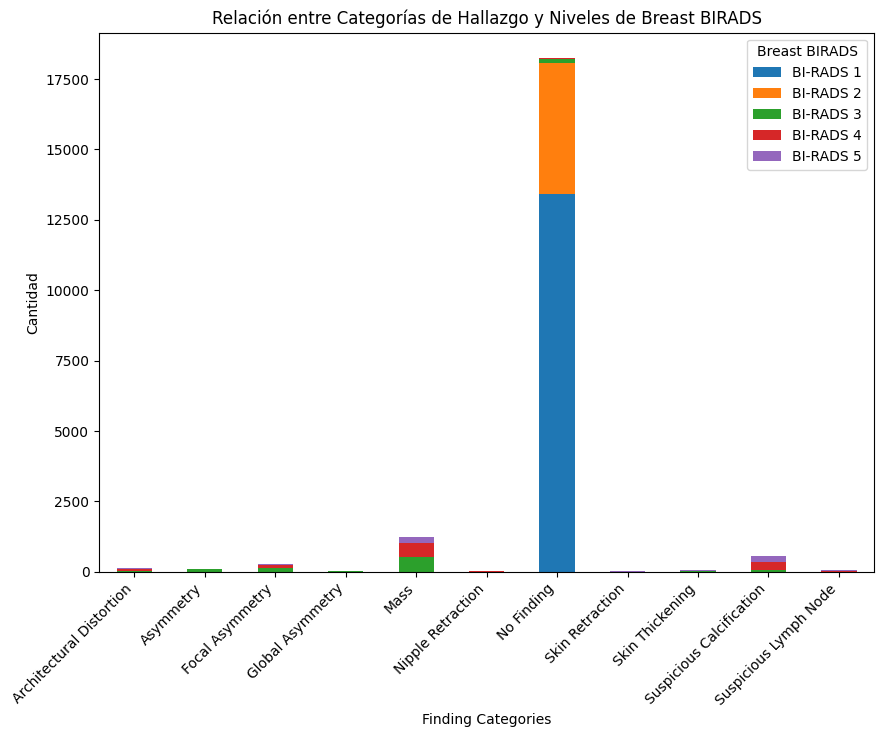

In [39]:
df['finding_categories'] = df['finding_categories'].apply(lambda x: x if isinstance(x, list) else [x])

df_exploded = df.explode('finding_categories')

frecuencia_categorias = pd.crosstab(df_exploded['finding_categories'], df_exploded['breast_birads'])

print(frecuencia_categorias)


frecuencia_categorias.plot(kind='bar', stacked=True, figsize=(10, 7))


plt.title('Relación entre Categorías de Hallazgo y Niveles de Breast BIRADS')
plt.xlabel('Finding Categories')
plt.ylabel('Cantidad')
plt.legend(title='Breast BIRADS')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

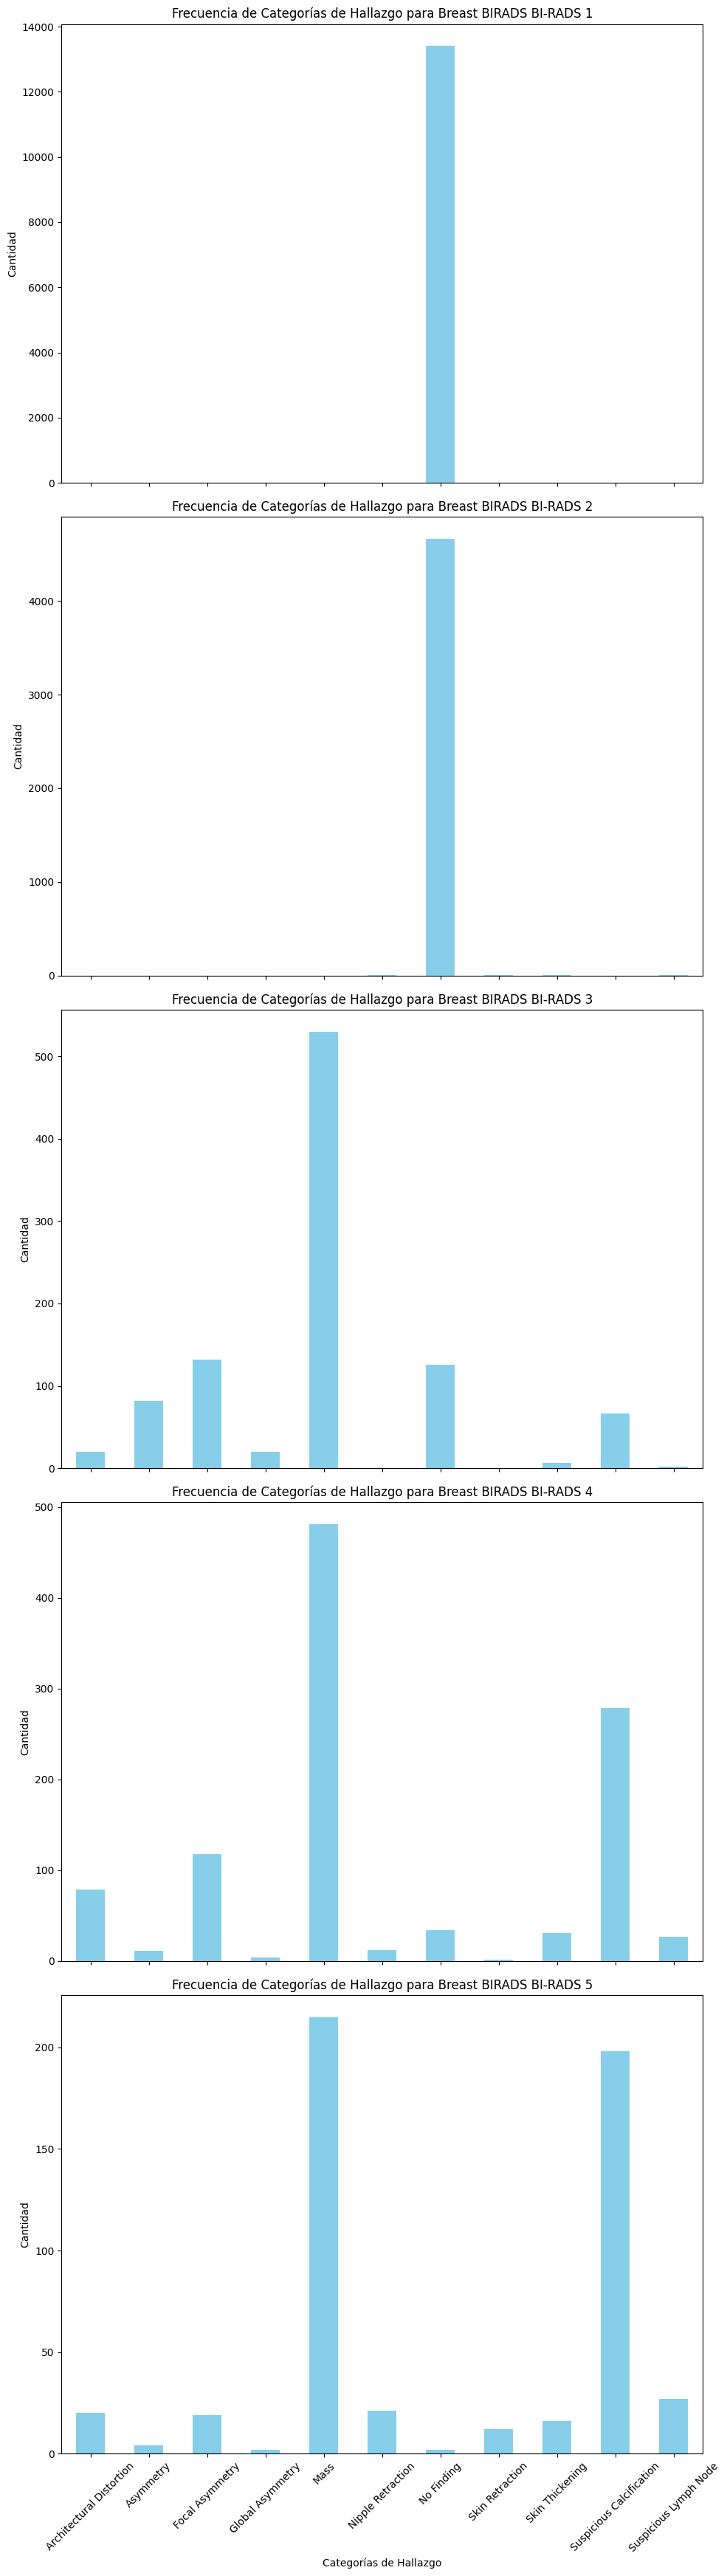

In [36]:
niveles_birads = frecuencia_categorias.columns

fig, axs = plt.subplots(len(niveles_birads), 1, figsize=(10, 7 * len(niveles_birads)), sharex=True)

for i, nivel in enumerate(niveles_birads):
    frecuencia_categorias[nivel].plot(kind='bar', ax=axs[i], color='skyblue')
    axs[i].set_title(f'Frecuencia de Categorías de Hallazgo para Breast BIRADS {nivel}')
    axs[i].set_xlabel('Categorías de Hallazgo')
    axs[i].set_ylabel('Cantidad')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [43]:
# Contar la cantidad de síntomas por caso
df['num_symptoms'] = df['finding_categories'].apply(len)

# Agrupar por nivel de BIRADS y contar la frecuencia de cada cantidad de síntomas
frecuencia_sintomas = df.groupby(['breast_birads', 'num_symptoms']).size().unstack(fill_value=0)

# Agregar la cantidad total de diagnósticos por nivel de BIRADS
total_diagnosticos = df['breast_birads'].value_counts().sort_index()

# Combinar la tabla de frecuencia de síntomas con la cantidad total de diagnósticos
resultado = frecuencia_sintomas.copy()
resultado.loc['Total'] = frecuencia_sintomas.sum()

resultado = resultado.join(total_diagnosticos.rename('Total Diagnósticos'))

# Mostrar la tabla con la frecuencia de síntomas y total de diagnósticos
print("Frecuencia de síntomas por nivel de BIRADS y total de diagnósticos:")
print(resultado)

# Mostrar los síntomas para cada combinación de BIRADS y cantidad de síntomas
for birads in df['breast_birads'].unique():
    print(f"\nSíntomas para Breast BIRADS {birads}:")
    sintomas_birads = df[df['breast_birads'] == birads][['num_symptoms', 'finding_categories']]
    sintomas_birads_grouped = sintomas_birads.groupby('num_symptoms')['finding_categories'].apply(lambda x: x.tolist()).to_dict()
    
    for num in sorted(sintomas_birads_grouped.keys()):
        sintomas_list = [item for sublist in sintomas_birads_grouped[num] for item in sublist]
        sintomas_unicos = sorted(set(sintomas_list))
        print(f"{num} síntoma(s): {', '.join(sintomas_unicos)}")

Frecuencia de síntomas por nivel de BIRADS y total de diagnósticos:
                   1    2   3  4  Total Diagnósticos
breast_birads                                       
BI-RADS 1      13406    0   0  0             13406.0
BI-RADS 2       4674    2   0  0              4676.0
BI-RADS 3        960   12   0  0               972.0
BI-RADS 4        939   60   6  0              1005.0
BI-RADS 5        333   81  11  2               427.0
Total          20312  155  17  2                 NaN

Síntomas para Breast BIRADS BI-RADS 4:
1 síntoma(s): Architectural Distortion, Asymmetry, Focal Asymmetry, Global Asymmetry, Mass, Nipple Retraction, No Finding, Skin Retraction, Skin Thickening, Suspicious Calcification, Suspicious Lymph Node
2 síntoma(s): Architectural Distortion, Asymmetry, Focal Asymmetry, Mass, Nipple Retraction, Skin Thickening, Suspicious Calcification
3 síntoma(s): Architectural Distortion, Global Asymmetry, Mass, Nipple Retraction, Skin Thickening, Suspicious Calcification

Sí

*Relación de ambas ambos tipos de mamas por diagnostico*

In [73]:
# Supongamos que df ya está cargado
df_sorted = df[['study_id', 'laterality', 'breast_birads', 'view_position']].sort_values(by='study_id')

# Inicializar variables para almacenar el conteo total
total_coincidencias = 0
total_no_coincidencias = 0

# Crear una lista para almacenar los detalles de no coincidencias
detalles_no_coincidencias = []

# Agrupar por 'study_id' y 'laterality'
grouped = df_sorted.groupby(['study_id', 'laterality'])

# Iterar sobre cada grupo
for (study_id, laterality), group in grouped:
    # Contar las ocurrencias de 'breast_birads' en 'CC' y 'MLO'
    cc_birads = set(group[group['view_position'] == 'CC']['breast_birads'])
    mlo_birads = set(group[group['view_position'] == 'MLO']['breast_birads'])
    
    # Contar coincidencias y no coincidencias
    coincidencias = len(cc_birads & mlo_birads)
    no_coincidencias = len((cc_birads - mlo_birads) | (mlo_birads - cc_birads))
    
    # Actualizar totales
    total_coincidencias += coincidencias
    total_no_coincidencias += no_coincidencias
    
    # Añadir detalles de no coincidencias a la lista
    if no_coincidencias > 0:
        # Filtrar filas que no coinciden
        no_coincide_cc = group[(group['view_position'] == 'CC') & (~group['breast_birads'].isin(mlo_birads))]
        no_coincide_mlo = group[(group['view_position'] == 'MLO') & (~group['breast_birads'].isin(cc_birads))]
        
        # Añadir a la lista de detalles
        detalles_no_coincidencias.extend(no_coincide_cc.to_dict('records'))
        detalles_no_coincidencias.extend(no_coincide_mlo.to_dict('records'))

# Crear DataFrame para los detalles de no coincidencias
df_detalles_no_coincidencias = pd.DataFrame(detalles_no_coincidencias)

# Mostrar el conteo total de coincidencias y no coincidencias
print(f"Total de coincidencias: {total_coincidencias}")
print(f"Total de no coincidencias: {total_no_coincidencias}")

# Mostrar los detalles de las no coincidencias
print("\nDetalles de no coincidencias:")
print(df_detalles_no_coincidencias[['study_id', 'laterality', 'breast_birads', 'view_position']])

Total de coincidencias: 9999
Total de no coincidencias: 1

Detalles de no coincidencias:
                           study_id laterality breast_birads view_position
0  dbca9d28baa3207b3187c4d07dc81a80          L     BI-RADS 2            CC
1  dbca9d28baa3207b3187c4d07dc81a80          L     BI-RADS 2            CC


*Relación Caracteristicas y Bi-Rads*



In [ ]:
Descripción de BI-Rads
- 

Densidad del seno y BI-Rads

Entre más densos sean sus senos, más difícil pueden ser ver las áreas anormales en los mamogramas, tener senos más densos también incrementa el riesgo de llegar a tener un diagnóstico de cáncer mamario.

Se encontró una relación entre mientras más denso el tejido mayor probabilidad de riesgo de cáncer de mamas.